In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
from scipy import interpolate as sp

In [2]:
hbar = 1.054571817e-34
C = 1e-12 # Circuit capacitance 1 pF
C_c = 1e-15 # Coupling capacitance 1 fF
C_tot = C + C_c
omega = 2*np.pi*5e9 # qubit frequency 5 GHz
T_sep = 2*np.pi/omega # time between pulses
K_j = 483597.8484e9 # flux quantum Hz/V
V_max = 2e-3 # pulse height 2 mV
pulse_width = 1/(V_max*K_j)
print(pulse_width*1e12,' ps')

1.033916924267275  ps


In [3]:
def ddf(x,width):
    val = np.zeros_like(x)
    val[(-(width/2)<=x) & (x<=(width/2))] = 1
    return val

In [46]:
n = 20
time_sep = 1/5e9
pulse_width = 1e-12
print("Time between pulses = ",1/5e9,"s")
print("Width of pulses", 1e-12,"s")
print("hbar omega=",hbar*omega*0.5)
print("Cc x Vmax x ... =",C_c*0.002*np.sqrt(hbar * omega * (1/(2*C))))

a1 = hbar*omega*0.5
a2 = C_c*0.002*np.sqrt(hbar * omega * (1/(2*C)))


Time between pulses =  2e-10 s
Width of pulses 1e-12 s
hbar omega= 1.65651753648502e-24
Cc x Vmax x ... = 2.5741154103769474e-24


width/tsep =  0.049999999999999996


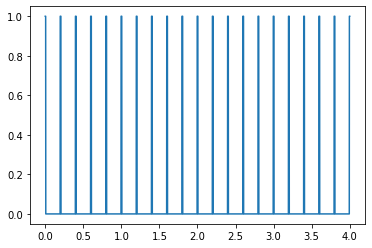

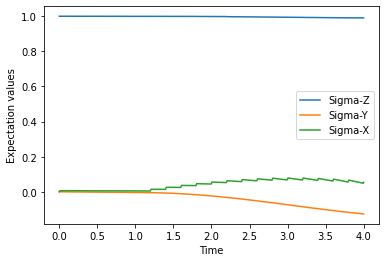

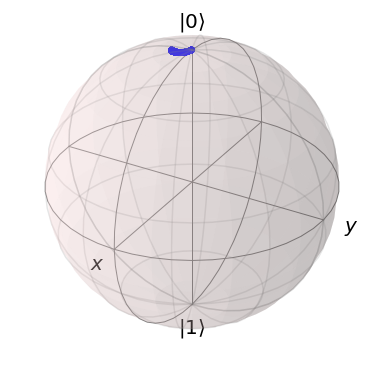

In [49]:

c1 = a1/(a1+a2)
c2 = a2/(a1+a2)

H0 = c1*(qeye(2)-sigmaz())
H1 = c2*sigmay()

# H0 = a1*(qeye(2)-sigmaz())
# H1 = a2*sigmay()

# width = 0.05
# tsep = 0.1



width = pulse_width*1e10
tsep = time_sep*1e9
n_steps = 20000

print("width/tsep = ",width/tsep)

n=20

times = np.linspace(0,n*tsep,n_steps)
pulses = ddf(times,width)
for i in range(n):
    pulses = np.add(pulses,ddf(times-(i+1)*tsep,width))
pulse_func = sp.interp1d(times,pulses)

#plt.plot(times,pulses)
plt.plot(times,pulse_func(times))


def H1_coeffs(t,args):
    times = np.linspace(0,(n+1)*tsep,n_steps)
    pulses = ddf(times,width)
    for i in range(n):
        pulses = np.add(pulses,ddf(times-(i+1)*tsep,width))
    pulse_func = sp.interp1d(times,pulses)
    return pulse_func(t)

H = [H0,[H1,H1_coeffs]]


psi0 = basis(2, 0)
#times = np.linspace(0.0, 10.0, 100)
result = sesolve(H, psi0, times, [sigmaz(), sigmay(),sigmax()])
fig, ax = plt.subplots()
ax.plot(result.times, result.expect[0]) 
ax.plot(result.times, result.expect[1]) 
ax.plot(result.times, result.expect[2]) 
ax.set_xlabel('Time') 
ax.set_ylabel('Expectation values') 
ax.legend(("Sigma-Z", "Sigma-Y","Sigma-X")) 
plt.show() 

exp_z = result.expect[0]
exp_y = result.expect[1]
exp_x = result.expect[2]

b = qutip.Bloch()
b.make_sphere()
pnts = [exp_x,exp_y,exp_z]
b.add_points(pnts)
b.render()
b.show()

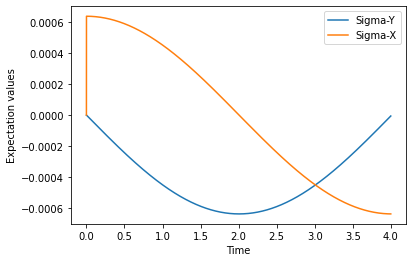

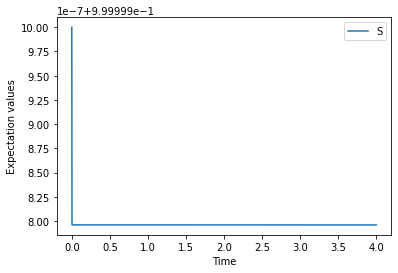

In [42]:
fig, ax = plt.subplots()
ax.plot(result.times, result.expect[1]) 
ax.plot(result.times, result.expect[2]) 
ax.set_xlabel('Time') 
ax.set_ylabel('Expectation values') 
ax.legend(( "Sigma-Y","Sigma-X")) 
plt.show() 
fig, ax = plt.subplots()
ax.plot(result.times, result.expect[0]) 

ax.set_xlabel('Time') 
ax.set_ylabel('Expectation values') 
ax.legend(( "Sigma-Z")) 
plt.show() 
